In [1]:
#Import module
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import stats
import scipy.optimize as optimization  
from lmfit import Parameters,minimize, fit_report
#Latex font
import matplotlib as mpl
from matplotlib import rc
plt.rc('text', usetex=True)
plt.rc('font', family='serif',size=16)

In [2]:
ls

2022_Feb_week4_Linear_fit_period.dat
2022_Feb_week4_Linear_fit_period.ipynb
2022_Feb_week4_Linear_fit_period_Sine_fit.py
2022_Feb_week4_Linear_fit_period_lmfit.ipynb
2022_Feb_week4_Linear_fit_period_weighted_data.ipynb
2022_Feb_week4_Mean_calculation_T0_combined.txt
2022_Feb_week4_OC_diagram.jpg
2022_Feb_week4_OC_diagram.out
2022_Feb_week4_new_ephemeris_sin_fit.ipynb
2022_Feb_week4_new_ephemeris_sin_fit.out
2022_Feb_week4_new_ephemeris_sin_fit_lmfit.ipynb
2022_Feb_week4_new_ephemeris_sin_fit_mean_data.ipynb
2022_Feb_week4_new_ephemeris_sin_fit_weight_data.txt
interporate.out


In [3]:
DP_Leo = open("2022_Feb_week4_Linear_fit_period.dat",'r').readlines()
N_dpleo = len(DP_Leo)

#Read datat
Cycle = []
T_obs = []
T_obs_err = []
#Please change the input file
for line in open("2022_Feb_week4_Linear_fit_period.dat"):
    li=line.strip()
    if not li.startswith("#"):
        Cycle.append(float(li.split("\t")[0]))
        T_obs.append(float(li.split("\t")[1]))
        T_obs_err.append(float(li.split("\t")[2]))

In [4]:
T0_bjd = 2448773.2148535196
T0_bjd_err = 2.9382757275464414e-09
P0_day = 0.062362845501702645
P0_day_err = 2.587983620097543e-19

In [5]:
#Arrays
BJD_time_a = [i for i in range(N_dpleo)]
Delta_aT = [i for i in range(N_dpleo)]
Delta_aT_err = [i for i in range(N_dpleo)]
E_af = [i for i in range(N_dpleo)] #float number
E_ak = [i for i in range(N_dpleo)] #integer number
E_aj = [i for i in range(N_dpleo)] #integer number
P_aE = [i for i in range(N_dpleo)]
P_err_aE = [i for i in range(N_dpleo)]
T_aC_linear = [i for i in range(N_dpleo)]
T_aO_linear = [i for i in range(N_dpleo)]
P_aver_a = [i for i in range(N_dpleo)]
P_aver_std_a = [i for i in range(N_dpleo)]

In [6]:
delta_tdb_tt = 0.0013/(24*60*60)
OC_cal = []
#print ('-----------------------------------------------------------------------------')
#print ('Cycle \t\t T_O \t   T_C \t\t BJD - 2450000 \t OC_lin OC_err_Lin OC_occ')
print('No. \t BJD_time \t Cycle \t T_O_linear \t T_C_linear \t OC_s \t\t OC_s_err')
#print ('-----------------------------------------------------------------------------')
for i in range (0,N_dpleo):
    BJD_time = np.array(T_obs)+delta_tdb_tt
    BJD_time_a[i] = BJD_time
    Delta_T = np.array(T_obs) - np.array(T0_bjd)
    Delta_aT[i] = Delta_T #arrays
    Delta_T_err = np.sqrt((np.array(T_obs_err)/np.array(T_obs))**2 + (np.array(T0_bjd_err)/np.array(T0_bjd))**2)
    E_k = Cycle
    E_ak[i] = E_k #arrays
    #    print (Delta_T_err[i])
    E_f = Delta_T / P0_day                      #Calculate cycle with float number
    ##    print (E_f)                                 #print cycle with float number
    E_af[i] = E_f #arrays
    E_j = np.round(Delta_T / P0_day)           #Calculate cycle with integer number
##print (Delta_T)
    if  E_j[i] != 0:
        P_E_day = Delta_T[i] / E_j[i]
        P_aE[i] = P_E_day
        P_E_err_day = np.abs((np.array(T_obs_err[i]) - np.array(T0_bjd_err)) / E_j[i])
        P_err_aE[i] = P_E_err_day
        T_O_linear = T0_bjd + P_aE[i]*E_j[i]               #Linear
        T_aO_linear[i] = T_O_linear #arrays
    else:
        E_k[i] = 1
        P_E_day = Delta_T[i] / E_k[i]
#        print (P_E_day)
        P_aE[i] = P_E_day
        P_E_err_day = np.abs((np.array(T_obs_err[i]) - np.array(T0_bjd_err)) / E_k[i])
        P_err_aE[i] = P_E_err_day
        T_O_linear = T0_bjd + P_aE[i]*E_k[i]               #Linear
        T_aO_linear[i] = T_O_linear #arrays
#    print ('%0.6f' %(T_O))
#print (E_j)                                #print cycle with integer number
    if  E_j[i] != 0:
        P_E_day = Delta_T[i] / E_j[i]
        P_aE[i] = P_E_day
        P_E_err_day = np.abs((np.array(T_obs_err[i]) - np.array(T0_bjd_err)) / E_j[i])
#        print (P_E_err_day)
        P_err_aE[i] = P_E_err_day
        T_C_linear = T0_bjd + P0_day*E_j[i]              #Linear
        T_aC_linear[i] = T_C_linear #arrays
#    print (T_O, T_C)
        OC = np.array(T_O_linear) - np.array(T_C_linear)
        OC_s = (np.array(T_O_linear) - np.array(T_C_linear))*24*60*60
        OC_err = np.abs(np.sqrt((np.array(P_err_aE[i])**2 + (np.array(P0_day_err)**2))) * np.array(E_j[i]))
#        print (OC_err)
        OC_s_err = OC_err*24*60*60
    else:
        P_E_day = Delta_T[i] / E_k[i]
        P_aE[i] = P_E_day
        P_E_err_day = np.abs((np.array(T_obs_err[i]) - np.array(T0_bjd_err)) / E_k[i])
        P_err_aE[i] = P_E_err_day
        T_C_linear = T0_bjd + P0_day*E_j[i]              #Linear
        T_aC_linear[i] = T_C_linear #arrays
#    print (T_O, T_C)
        OC = np.array(T_O_linear) - np.array(T_C_linear)
        OC_s = (np.array(T_O_linear) - np.array(T_C_linear))*24*60*60
        OC_err = np.abs(np.sqrt((np.array(P_err_aE[i])**2)) *np.array(E_k[i]))
#        print (OC_err)
        OC_s_err = OC_err*24*60*60
    print ('%0.0f\t%0.6f\t%0.0f\t%0.6f\t%0.6f\t%0.6f\t%0.6f' %(i, BJD_time[i], Cycle[i], T_O_linear, T_C_linear, OC_s, OC_s_err))
    OC_cal.append('%0.6f\t%0.0f\t%0.6f\t%0.6f\t%0.6f\t%0.6f' %(BJD_time[i], Cycle[i], T_O_linear, T_C_linear, OC_s, OC_s_err))

#P_aver = mean(P_aE[i])
#P_aver_a[i] = P_aver
#P_aver_std = np.std(P_aE[i])
#P_aver_std = mean(P_err_aE[i])
#P_aver_std_a[i] = P_aver_std
#print('%0.11f %0.11f' %(P_aver, P_aver_std))

rerults = OC_cal
f = open("2022_Feb_week4_OC_diagram.out", 'w')
for i in range(len(rerults)):
    f.write(str(rerults[i])+ '\n')
f.close()

No. 	 BJD_time 	 Cycle 	 T_O_linear 	 T_C_linear 	 OC_s 		 OC_s_err
0	2444214.553250	-73099	2444214.553250	2444214.553210	3.439531	14.687746
1	2444214.615620	-73098	2444214.615620	2444214.615573	4.057673	14.687746
2	2444214.677980	-73097	2444214.677980	2444214.677936	3.811848	14.687746
3	2444968.023090	-61017	2444968.023090	2444968.021110	171.111524	100.223746
4	2444968.957120	-61002	2444968.957120	2444968.956552	49.055779	100.223746
5	2444969.019620	-61001	2444969.019620	2444969.018915	60.905926	100.223746
6	2444978.997550	-60841	2444978.997550	2444978.996970	50.081724	100.223746
7	2444993.900780	-60602	2444993.900780	2444993.901690	-78.660768	59.615746
8	2444993.963280	-60601	2444993.963280	2444993.964053	-66.810621	59.615746
9	2444994.026420	-60600	2444994.026420	2444994.026416	0.335544	59.615746
10	2445020.905130	-60169	2445020.905130	2445020.904803	28.293590	19.871746
11	2445021.902920	-60153	2445021.902920	2445021.902608	26.951976	19.871746
12	2445024.833860	-60106	2445024.833860

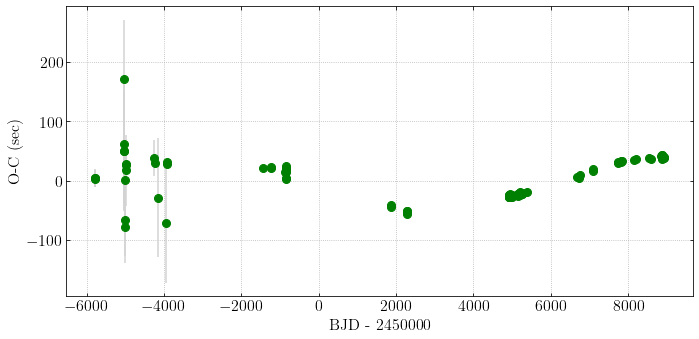

In [7]:
#Plot O-C vs BJD
Input  = '2022_Feb_week4_OC_diagram.out'
Data   = np.genfromtxt(Input)

N = 2450000
BJD_time = Data[:,0] - N
Cycle = Data[:,1]
T_O_linear = Data[:,2]
T_C_linear = Data[:,3]
OC_s = Data[:,4]
OC_s_err = Data[:,5]

 ##Plotgraph
fig=plt.figure(figsize=(10, 5), tight_layout=True)
plt.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')

x1 = min(BJD_time)
x2 = max(BJD_time)
#plt.errorbar(BJD_time, OC_s, yerr=OC_s_err, fmt='o', color='limegreen')
plt.errorbar(BJD_time, OC_s, yerr= OC_s_err, fmt='o', markersize=8, color='green',
                    ecolor='lightgray')

#Schwope_2002
#plt.text(BJD_time_Schwope_2002[0], 300, '1979')
#plt.text(BJD_time_Schwope_2002[3], 300, '1981')
#plt.text(BJD_time_Schwope_2002[13], 300, '1984')
#plt.text(BJD_time_Schwope_2002[17], 300, '1985')
#plt.text(BJD_time_Schwope_2002[19]-100, 300, '1991')
#plt.text(BJD_time_Schwope_2002[20], 300, '1992')
#plt.text(BJD_time_Schwope_2002[22], 300, '1993')
#plt.text(BJD_time_Schwope_2002[30], 300, '2000')
#plt.text(BJD_time_Schwope_2002[32], 300, '2002')

#plt.hlines(y= 0, xmin= x1, xmax= x2, colors='k', linestyles='dotted')
#plt.xlim(x1,x2)
#plt.ylim(-20,20)
plt.xlabel('BJD - 2450000')
plt.ylabel('O-C (sec)')
#plt.legend()
plt.grid(linestyle='dotted')
######plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig(output_filename, dpi=1000)
plt.savefig("2022_Feb_week4_OC_diagram.jpg", dpi=1000)
plt.show()

In [8]:
#Read data ---#1
Input = "2022_Feb_week4_OC_diagram.out"
Data   = np.genfromtxt(Input)

Epoch = Data[:,1]
OC = Data[:,4]
OC_err = Data[:,5]

In [9]:
x = Epoch
y = OC
dy = OC_err

len_x = len(x)
print(len_x)

114


In [10]:
def sin_fitting_lmfit(params, x, y):
    a = params['a']
    b = params['b']
    c = params['c']
    d = params['d']
    y_fit = a*np.sin(b*x - c) + d
    return y_fit - y

In [110]:
# Defining the various parameters
params = Parameters()

# Intercept is made fixed at 0.0 value
params.add('a', value=41, vary = True)
params.add('b', min=0.00003, max=0.00005)
params.add('c', min=-145, max=-144)
params.add('d', min=-6, max=-4)

In [111]:
# Calling the minimize function. Args contains the x and y data.
fitted_params = minimize(sin_fitting_lmfit, params, args=(x,y,), method='least_squares')

In [112]:
# Getting the fitted values
a = fitted_params.params['a'].value
b = fitted_params.params['b'].value    
c = fitted_params.params['c'].value
d = fitted_params.params['d'].value

In [113]:
# Printing the fitted values
print('a is ', a)
print('b is ', b)
print('c is ', c)
print('d is ', d)

a is  -41.81619029779052
b is  3.178857462472306e-05
c is  -144.0000000001414
d is  -5.999999999993662


In [114]:
# Pretty printing all the statistical data
print(fit_report(fitted_params))

[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 11
    # data points      = 114
    # variables        = 4
    chi-square         = 60742.5436
    reduced chi-square = 552.204942
    Akaike info crit   = 723.714933
    Bayesian info crit = 734.659727
[[Variables]]
    a: -41.8161903 +/- 4.16106965 (9.95%) (init = 41)
    b:  3.1789e-05 +/- 1.2408e-06 (3.90%) (init = 3e-05)
    c: -144.000000 +/- 0.10695106 (0.07%) (init = -145)
    d: -6.00000000 +/- 3.45833329 (57.64%) (init = -6)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, d) = 0.454
    C(b, c) = 0.448
    C(b, d) = -0.441
    C(a, b) = -0.426
    C(c, d) = 0.362


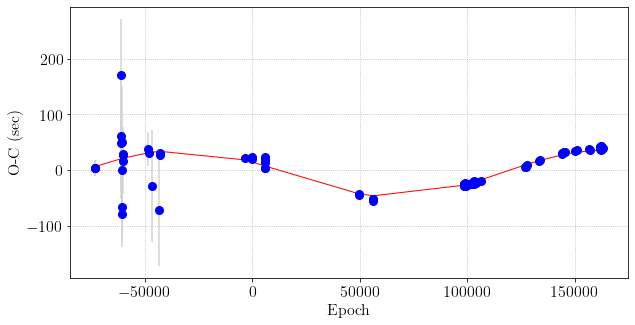

In [116]:
#Plotgraph
fig=plt.figure(figsize=(10, 5))
plt.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray')
# create a line plot for the mapping function

plt.plot(x, a*np.sin(b*x - c) + d,c='red',ls='-',lw=1)
#plt.plot(x_line, y_line, '-', color='red')
#plt.plot(BJD_time, OC_s_ecc, lw=2, color='black')
#plt.xlim(-6000,6000)
#plt.ylim(-200,200)
#plt.ylim(-40,60)
plt.xlabel('Epoch')
plt.ylabel('O-C (sec)')
plt.grid(linestyle='dotted')
#####plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig(output_filename, dpi=1000)
plt.show()